<a href="https://colab.research.google.com/github/OmamaSajid/deeplearning/blob/main/vehicleclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json



In [8]:
!kaggle datasets download -d mohamedmaher5/vehicle-classification


Dataset URL: https://www.kaggle.com/datasets/mohamedmaher5/vehicle-classification
License(s): CC0-1.0
 92% 758M/827M [00:04<00:01, 40.3MB/s]
100% 827M/827M [00:04<00:00, 200MB/s] 


In [9]:
!unzip vehicle-classification.zip -d vehicle_dataset

Streaming output truncated to the last 5000 lines.
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (630).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (631).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (632).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (633).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (634).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (635).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (636).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (637).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (638).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (639).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (64).jpg  
  inflating: vehicle_dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (640).jpg  
  

In [10]:
!ls vehicle_dataset


Vehicles


In [11]:
import os

root_path = "/content/vehicle_dataset"

print(f"📂 Root folder: {root_path}")
print("Classes found:\n")

# Loop through class folders
for class_name in sorted(os.listdir(root_path)):
    class_path = os.path.join(root_path, class_name)

    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        print(f"📁 {class_name} - {len(files)} files")
        print("   Sample files:", files[:3])  # Show up to 3 file names
        print()


📂 Root folder: /content/vehicle_dataset
Classes found:

📁 Vehicles - 7 files
   Sample files: ['Cars', 'Bikes', 'Trains']



In [12]:
dataset_dir = "/content/vehicle_dataset/Vehicles"


In [13]:
import os

root_path = "/content/vehicle_dataset/Vehicles"

print(f"📂 Class Root: {root_path}")
print("Classes found:\n")

for class_name in sorted(os.listdir(root_path)):
    class_path = os.path.join(root_path, class_name)

    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        print(f"📁 {class_name} - {len(files)} files")
        print("   Sample files:", files[:3])
        print()


📂 Class Root: /content/vehicle_dataset/Vehicles
Classes found:

📁 Auto Rickshaws - 800 files
   Sample files: ['Auto Rickshaw (26).jpg', 'Auto Rickshaw (561).jpg', 'Auto Rickshaw (584).jpg']

📁 Bikes - 800 files
   Sample files: ['Bike (624).jpg', 'Bike (503).jpg', 'Bike (96).jpg']

📁 Cars - 790 files
   Sample files: ['Car (775).jpg', 'Car (191).jpg', 'Car (161).jpg']

📁 Motorcycles - 800 files
   Sample files: ['Motorcycle (222).jpg', 'Motorcycle (153).jpg', 'Motorcycle (35).jpg']

📁 Planes - 800 files
   Sample files: ['Plane (237).jpg', 'Plane (312).jpg', 'Plane (706).jpg']

📁 Ships - 800 files
   Sample files: ['Ship (778).jpg', 'Ship (209).jpg', 'Ship (722).jpg']

📁 Trains - 800 files
   Sample files: ['Train (584).jpg', 'Train (83).jpg', 'Train (565).png']



In [14]:
import os
import shutil
import random

# Paths
original_dataset_dir = '/content/vehicle_dataset/Vehicles'
base_dir = '/content/split_vehicle_dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create base train/test folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# For each class folder
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    # Get and shuffle image files
    files = os.listdir(class_path)
    random.shuffle(files)

    # Split index for 80% train
    split_index = int(0.8 * len(files))
    train_files = files[:split_index]
    test_files = files[split_index:]

    # Create class subfolders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Copy train images
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_dir, class_name, file)
        shutil.copy2(src, dst)

    # Copy test images
    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_dir, class_name, file)
        shutil.copy2(src, dst)

print("✅ Done! Dataset split into 80% train and 20% test folders at:")
print(f"   - {train_dir}")
print(f"   - {test_dir}")


✅ Done! Dataset split into 80% train and 20% test folders at:
   - /content/split_vehicle_dataset/train
   - /content/split_vehicle_dataset/test


In [15]:
for split in ['train', 'test']:
    split_path = os.path.join(base_dir, split)
    print(f"\n📁 {split.capitalize()} Set:")
    for cls in sorted(os.listdir(split_path)):
        cls_path = os.path.join(split_path, cls)
        num_files = len(os.listdir(cls_path))
        print(f"   {cls}: {num_files} images")



📁 Train Set:
   Auto Rickshaws: 640 images
   Bikes: 640 images
   Cars: 632 images
   Motorcycles: 640 images
   Planes: 640 images
   Ships: 640 images
   Trains: 640 images

📁 Test Set:
   Auto Rickshaws: 160 images
   Bikes: 160 images
   Cars: 158 images
   Motorcycles: 160 images
   Planes: 160 images
   Ships: 160 images
   Trains: 160 images


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,transforms,models
import os

In [17]:
datatransform={
    'train':transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test':transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

    ])

}

In [18]:
data_dir = '/content/split_vehicle_dataset/'  # for training + optional validation


In [19]:
train_dir = '/content/split_vehicle_dataset/train'
test_dir = '/content/split_vehicle_dataset/test'

In [20]:
train_dataset = datasets.ImageFolder(train_dir, transform=datatransform['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=datatransform['test'])

In [21]:
print("Train Classes:", train_dataset.classes)
print("Test Classes:", test_dataset.classes)

print("Training images:", len(train_dataset))
print("Testing images:", len(test_dataset))


Train Classes: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']
Test Classes: ['Auto Rickshaws', 'Bikes', 'Cars', 'Motorcycles', 'Planes', 'Ships', 'Trains']
Training images: 4472
Testing images: 1117


In [22]:
from torch.utils.data import DataLoader
train_load=DataLoader(train_dataset,batch_size=32,shuffle=True,num_workers=2)
test_load=DataLoader(test_dataset,batch_size=32,shuffle=True,num_workers=2)


In [23]:
model=models.resnet18(pretrained=True)
for name,param in model.named_parameters():
  if "fc" in name:
    param.requires_grad=True
  else:
    param.requires_grad=False
  criterion=nn.CrossEntropyLoss()
  optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.9MB/s]


In [25]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_load:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")
    print("Training complete for this epoch ✅")


Epoch 1/10 - Loss: 0.2538 - Acc: 0.9195
Training complete for this epoch ✅
Epoch 2/10 - Loss: 0.2369 - Acc: 0.9217
Training complete for this epoch ✅
Epoch 3/10 - Loss: 0.2224 - Acc: 0.9244
Training complete for this epoch ✅
Epoch 4/10 - Loss: 0.2069 - Acc: 0.9298
Training complete for this epoch ✅
Epoch 5/10 - Loss: 0.2030 - Acc: 0.9325
Training complete for this epoch ✅
Epoch 6/10 - Loss: 0.1977 - Acc: 0.9284
Training complete for this epoch ✅
Epoch 7/10 - Loss: 0.1976 - Acc: 0.9343
Training complete for this epoch ✅
Epoch 8/10 - Loss: 0.1861 - Acc: 0.9410
Training complete for this epoch ✅
Epoch 9/10 - Loss: 0.1808 - Acc: 0.9374
Training complete for this epoch ✅
Epoch 10/10 - Loss: 0.1840 - Acc: 0.9392
Training complete for this epoch ✅


In [26]:
torch.save(model.state_dict(), 'vehicle_classification_model.pth')

In [42]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # No gradients needed for testing
    for inputs, labels in test_load:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)  # Get predicted class

        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

test_accuracy = correct / total
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Accuracy: 0.9812


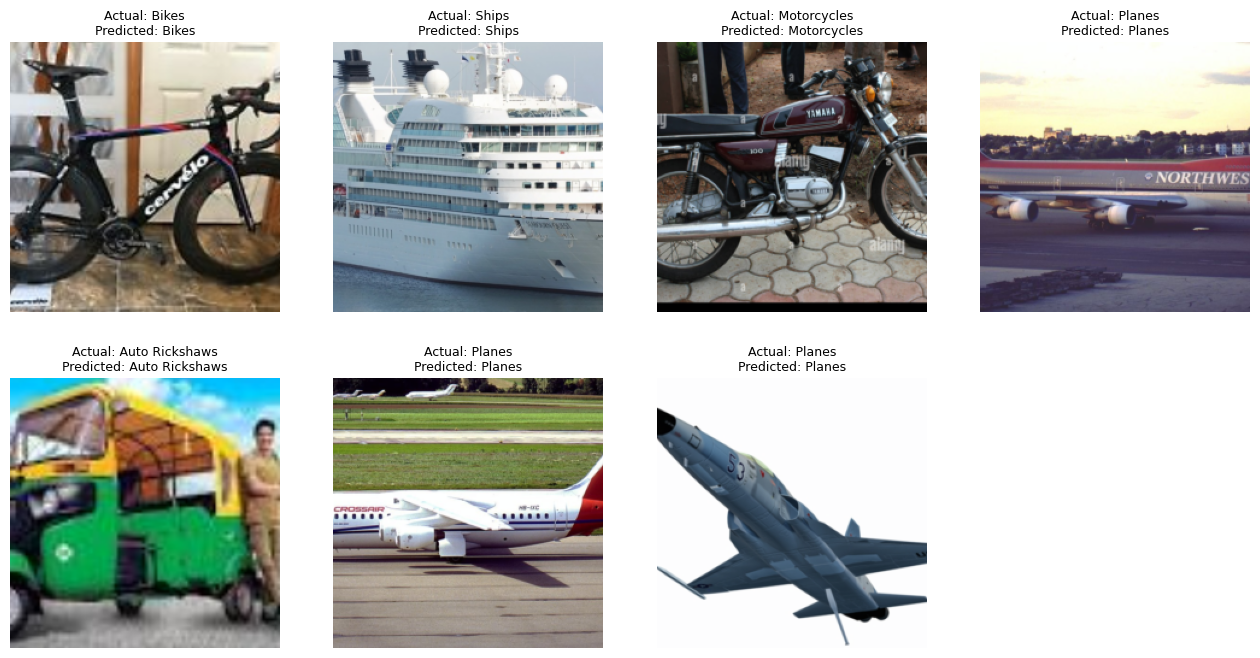

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Function to un-normalize and show image
def imshow(inp, title=None):
    inp = inp.cpu().numpy().transpose((1, 2, 0))  # Convert tensor to HWC
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # Un-normalize
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title, fontsize=9)
    plt.axis('off')

# Set model to evaluation mode
model.eval()

# Combine all test images and labels into lists
all_images = []
all_labels = []

for inputs, labels in test_load:
    for i in range(inputs.size(0)):
        all_images.append(inputs[i])
        all_labels.append(labels[i])

# Randomly pick 7 indices
sample_indices = random.sample(range(len(all_images)), 7)

# Plot the 7 randomly selected images with predictions
plt.figure(figsize=(16, 8))

for i, idx in enumerate(sample_indices):
    image = all_images[idx].unsqueeze(0).to(device)  # Add batch dim
    label = all_labels[idx].to(device)

    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)

    actual = test_dataset.classes[label]
    predicted = test_dataset.classes[pred]

    ax = plt.subplot(2, 4, i + 1)
    imshow(image.squeeze(0), title=f"Actual: {actual}\nPredicted: {predicted}")


In [37]:
from google.colab import files
uploaded = files.upload()

Saving ssss.jpeg to ssss.jpeg


In [38]:
from PIL import Image
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


✅ Predicted Class: Planes


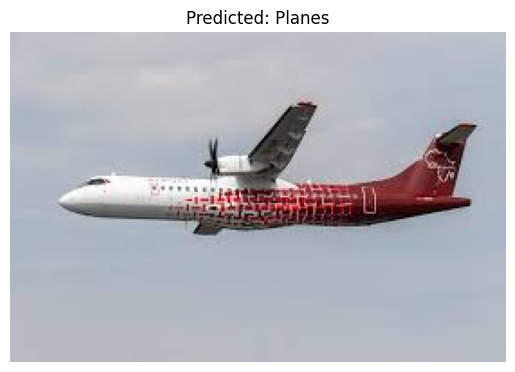

In [40]:
img_path = list(uploaded.keys())[0]  # This will grab the first uploaded filename
img = Image.open(img_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)

# Prediction
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, pred = torch.max(output, 1)

predicted_class = test_dataset.classes[pred.item()]
print(f"✅ Predicted Class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
